In [1]:
import os 
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import defaultdict

import sys
sys.path.extend(['../..', '.'])
from nebula.plots import plotCrossValidationFolder, plotCrossValidationFieldvsKeys, plotVocabSizeMaxLenTests, plotCrossValidationDict, plotCrossValidationTrainingTime, plotVocabSizeMaxLenArchComparison, plotVocabSizeMaxLenHeatmap
from nebula.evaluation import readCrossValidationFolder, readCrossValidationMetricFile

PLOT_OUT_FOLDER = "./_crossValidationPlots/"

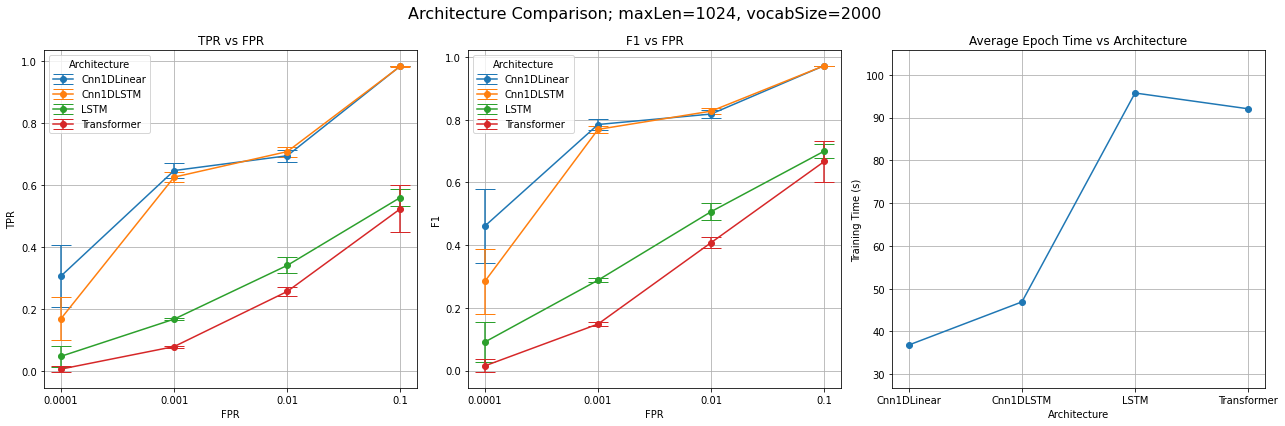

In [9]:
savePath = f"{PLOT_OUT_FOLDER}_modelArchitectureComparison.png"
title = None
figSize = (18, 6)
field="Architecture"

vmFolders = [x for x in os.listdir() if "VocabSize_maxLen" in x]
_, _ = plotVocabSizeMaxLenArchComparison(vmFolders, maxLen=1024, vocabSize=2000, savePath=savePath, title=title, legendTitle=field)

## 1D-CNN Neural Network Configuration

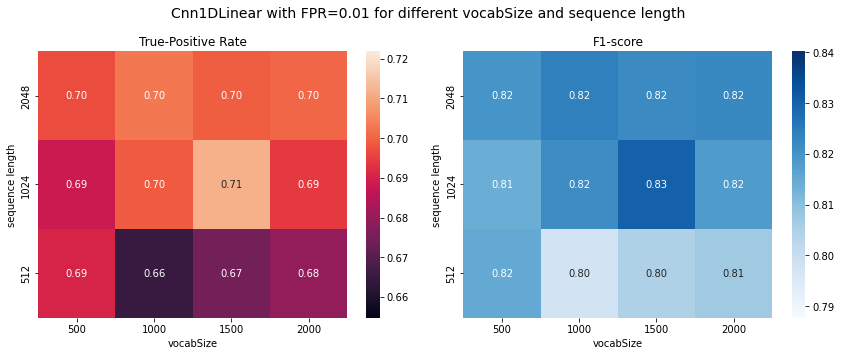

In [2]:
inFolder = "Cnn1DLinear_VocabSize_maxLen"
fpr = "0.01"
plotVocabSizeMaxLenHeatmap(inFolder, fpr, savePath=f"{PLOT_OUT_FOLDER}/{inFolder}_heatmap.png", rangeL=0.01, figSize=(12, 5))

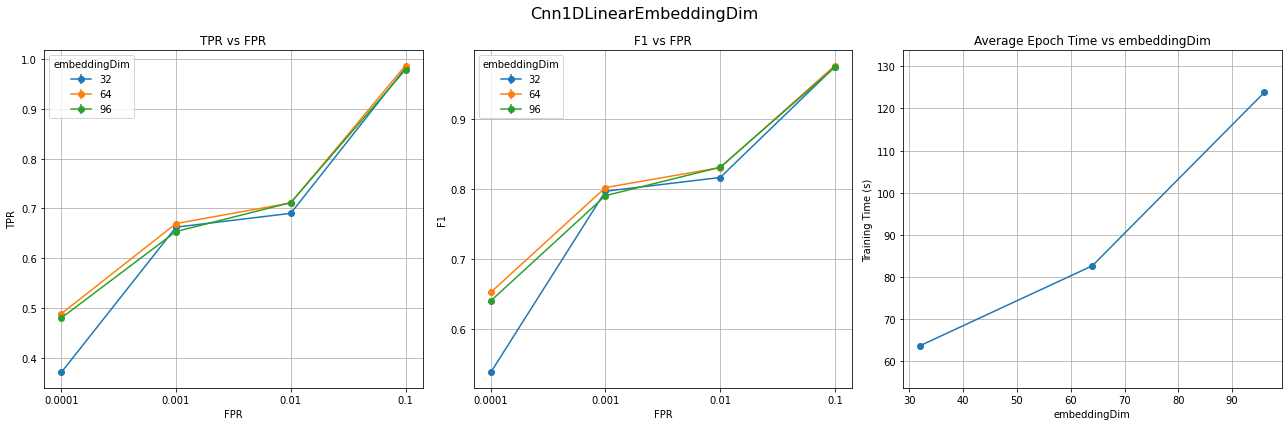

In [4]:
inFolder = "Cnn1DLinearEmbeddingDim"
field = "embeddingDim"
diffExtractor = lambda x: x.split(field)[1].split("_")[1]

plotCrossValidationFolder(inFolder, field, diffExtractor, savePath=f"{PLOT_OUT_FOLDER}{inFolder}.png")

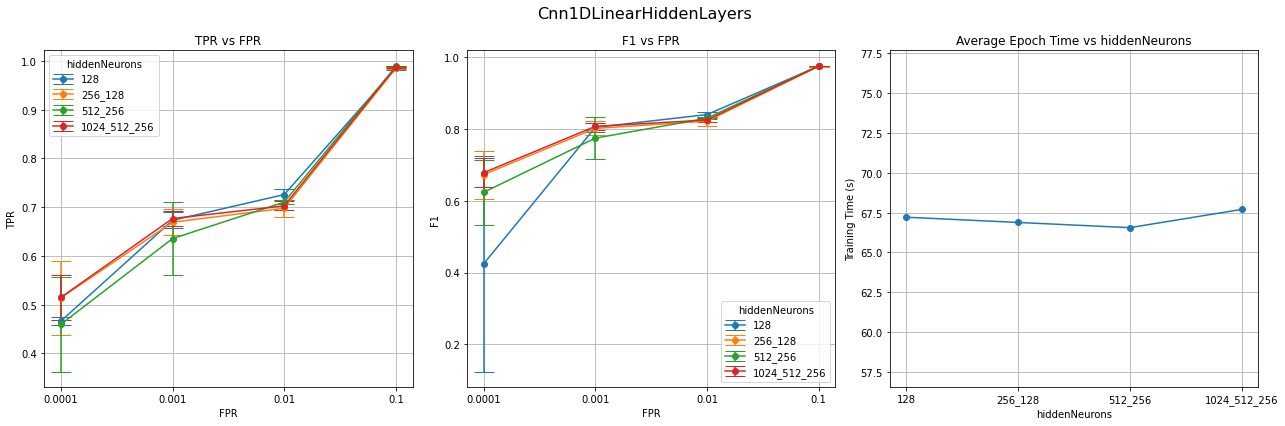

In [5]:
inFolder = "Cnn1DLinearHiddenLayers"
field = "hiddenNeurons"
diffExtractor = lambda x: x.split(field)[1].split("batch")[0].strip("_")

plotCrossValidationFolder(inFolder, field, diffExtractor, savePath=f"{PLOT_OUT_FOLDER}{inFolder}.png")

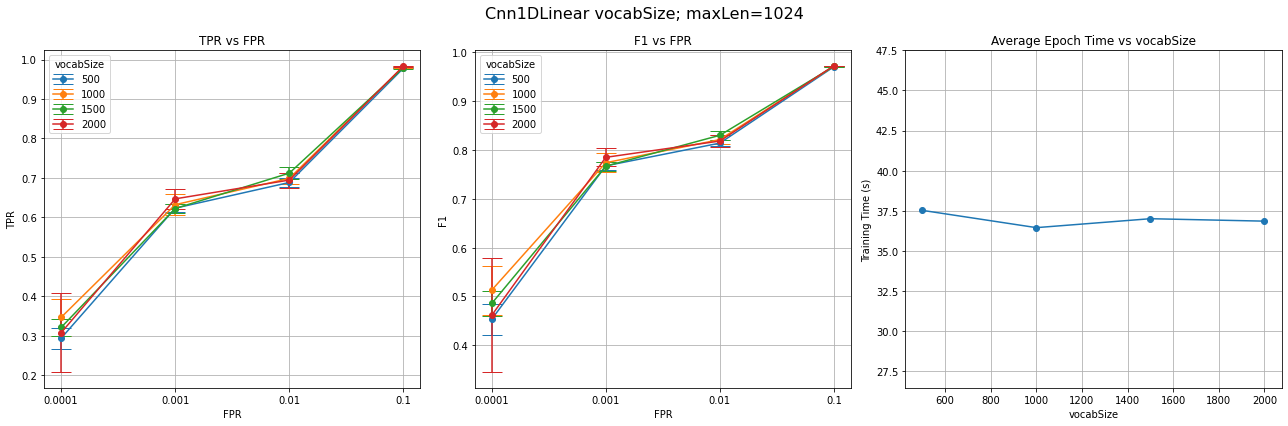

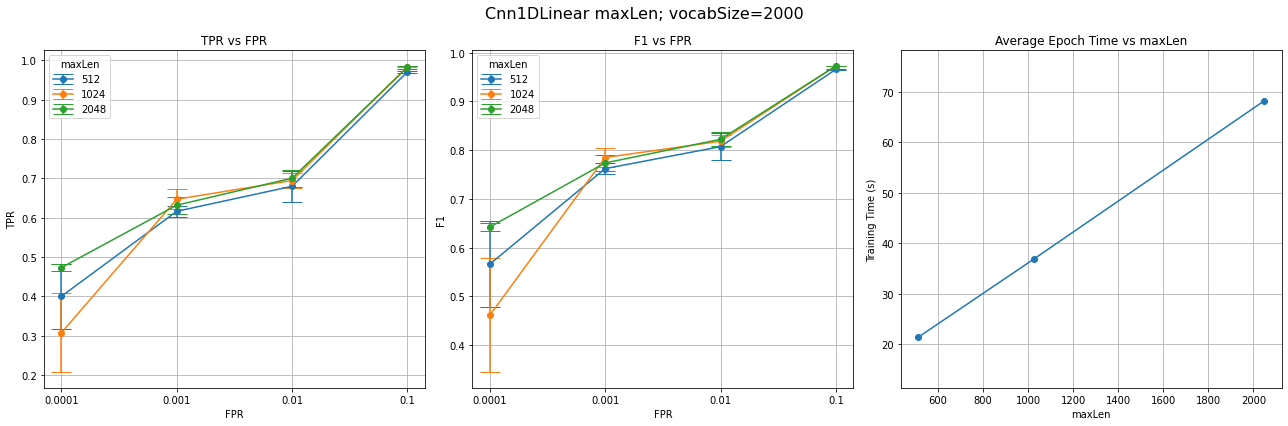

In [6]:
inFolder = "Cnn1DLinear_VocabSize_maxLen"
plotVocabSizeMaxLenTests(inFolder, PLOT_OUT_FOLDER)

## 1D-CNN with bidirectional LSTM

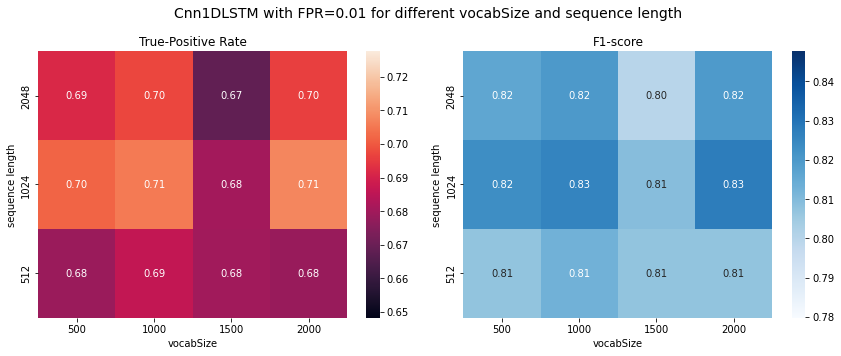

In [12]:
inFolder = "Cnn1DLSTM_VocabSize_maxLen"
fpr = "0.01"
plotVocabSizeMaxLenHeatmap(inFolder, fpr, savePath=f"{PLOT_OUT_FOLDER}/{inFolder}_heatmap.png", rangeL=0.02, figSize=(12, 5))

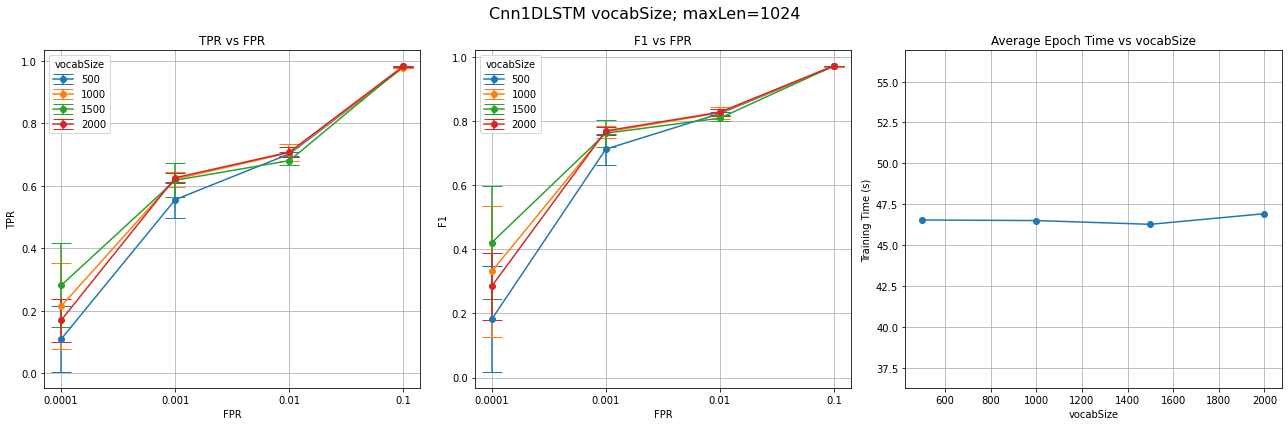

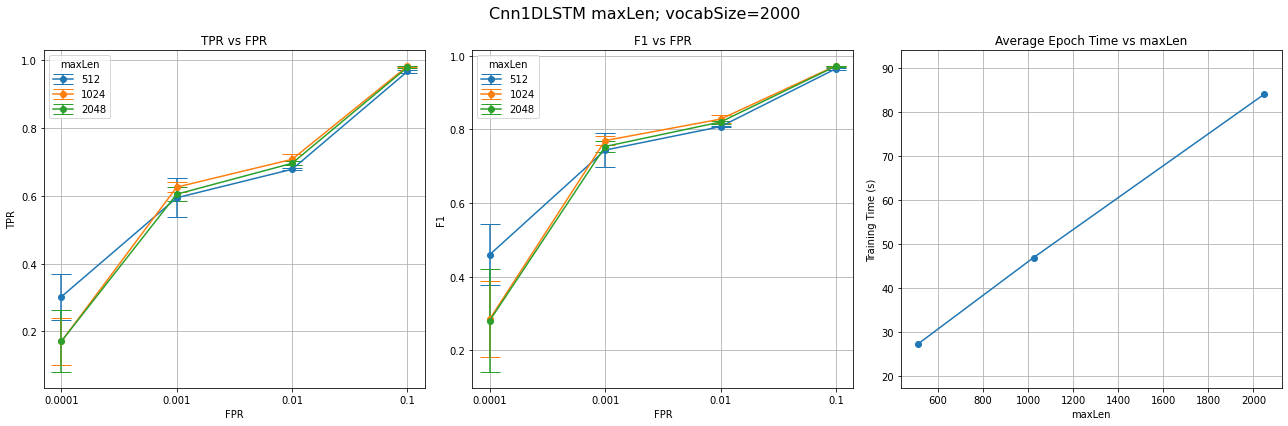

In [4]:
plotVocabSizeMaxLenTests(inFolder, PLOT_OUT_FOLDER)

## Transformer Configuration

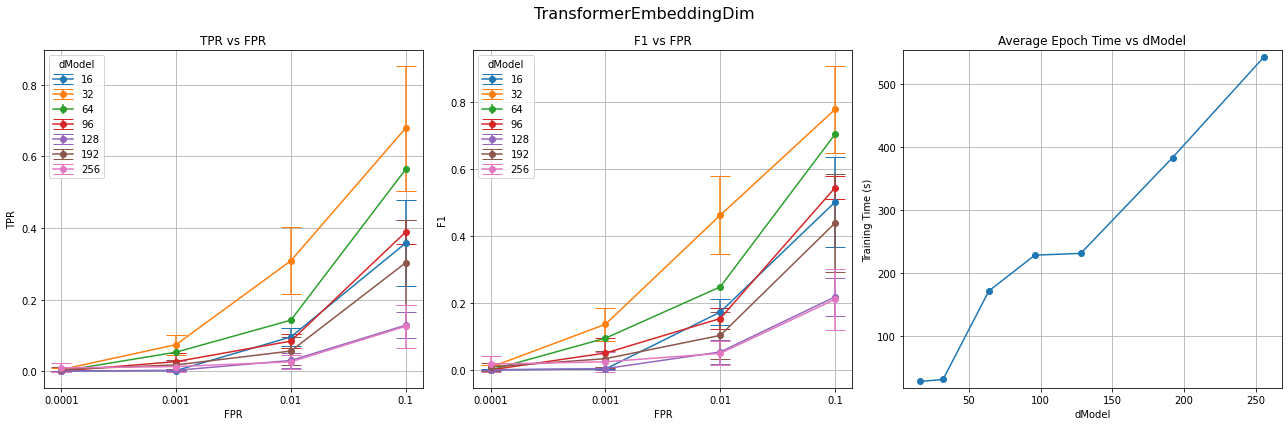

In [7]:
inFolder = "TransformerEmbeddingDim"
field = "dModel"
diffExtractor = lambda x: x.split(field)[1].split("_")[1]

plotCrossValidationFolder(inFolder, field, diffExtractor, savePath=f"{PLOT_OUT_FOLDER}{inFolder}.png")

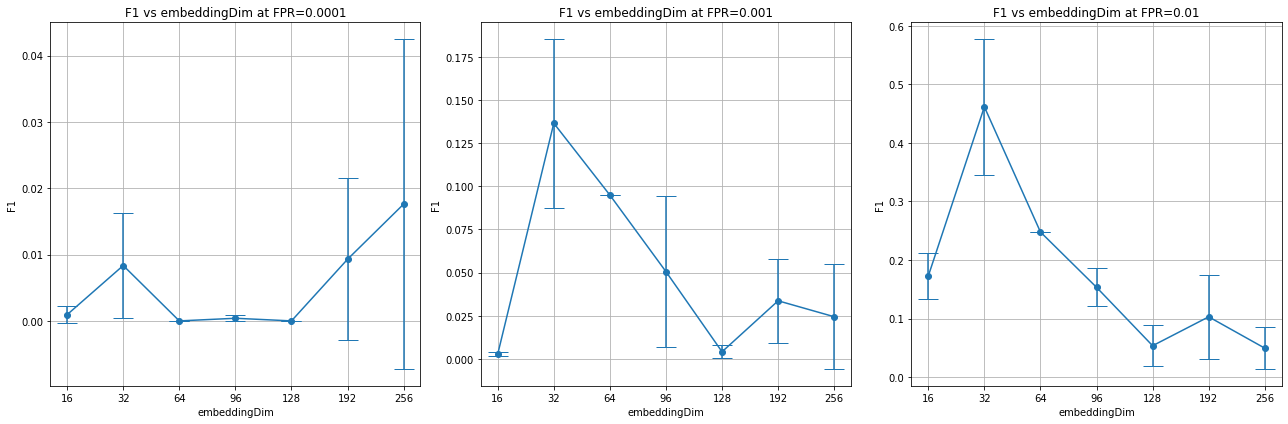

In [8]:
dfDict, timeDict = readCrossValidationFolder(inFolder, diffExtractor)
# make 6 plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
# loop over axis
plotCrossValidationFieldvsKeys(dfDict, "f1", "embeddingDim", 0.0001, ax=ax[0])
plotCrossValidationFieldvsKeys(dfDict, "f1", "embeddingDim", 0.001, ax=ax[1])
plotCrossValidationFieldvsKeys(dfDict, "f1", "embeddingDim", 0.01, ax=ax[2])
plt.tight_layout()
plt.savefig(f"{PLOT_OUT_FOLDER}Transformer_F1_vs_EmbeddingDim.png")

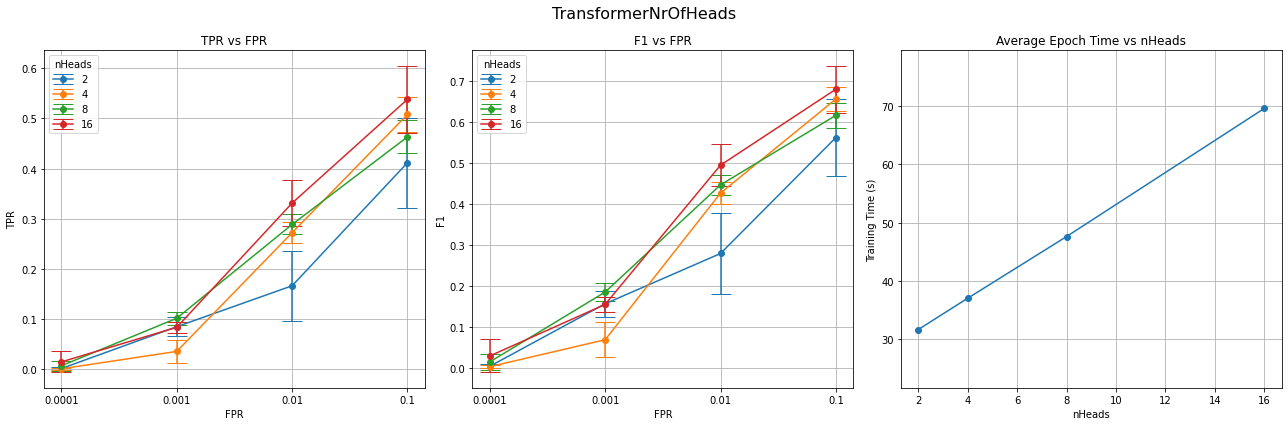

In [9]:
inFolder = "TransformerNrOfHeads"
field = "nHeads"
diffExtractor = lambda x: x.split(field)[1].split("_")[1]

plotCrossValidationFolder(inFolder, field, diffExtractor, savePath=f"{PLOT_OUT_FOLDER}{inFolder}.png")

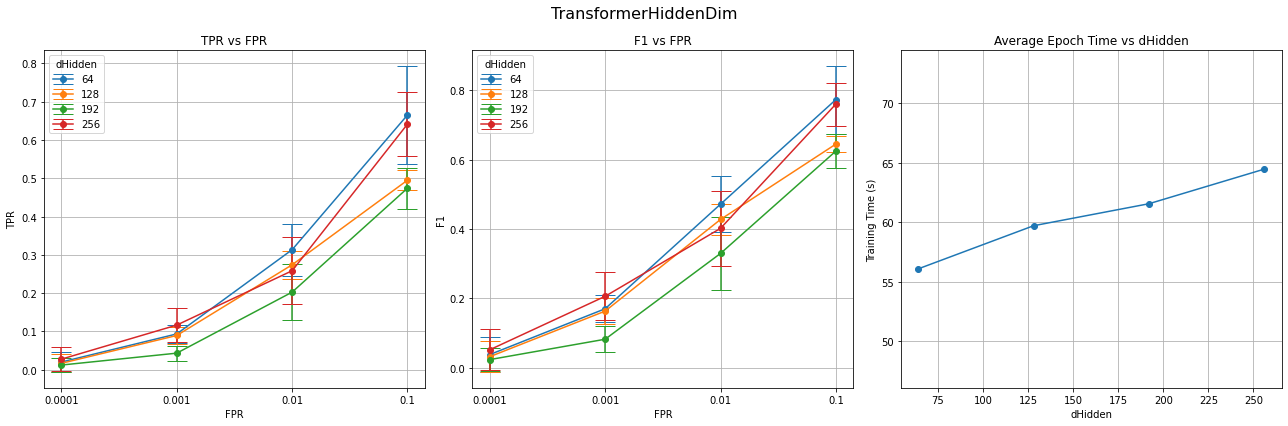

In [10]:
inFolder = "TransformerHiddenDim"
field = "dHidden"
diffExtractor = lambda x: x.split(field)[1].split("_")[1]

plotCrossValidationFolder(inFolder, field, diffExtractor, savePath=f"{PLOT_OUT_FOLDER}{inFolder}.png")

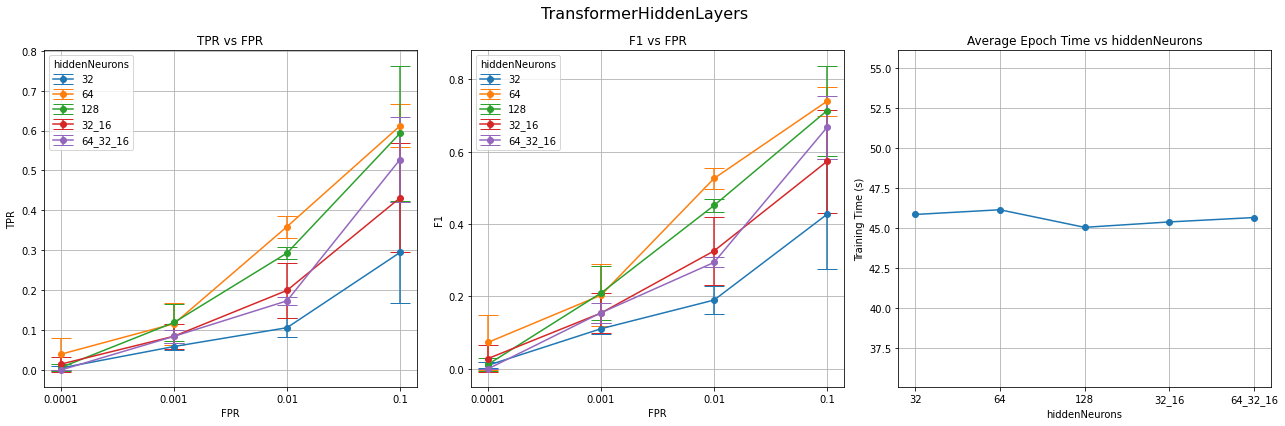

In [11]:
inFolder = "TransformerHiddenLayers"
field = "hiddenNeurons"
diffExtractor = lambda x: x.split(field)[1].split("layerNorm")[0].strip("_")

plotCrossValidationFolder(inFolder, field, diffExtractor, savePath=f"{PLOT_OUT_FOLDER}{inFolder}.png")

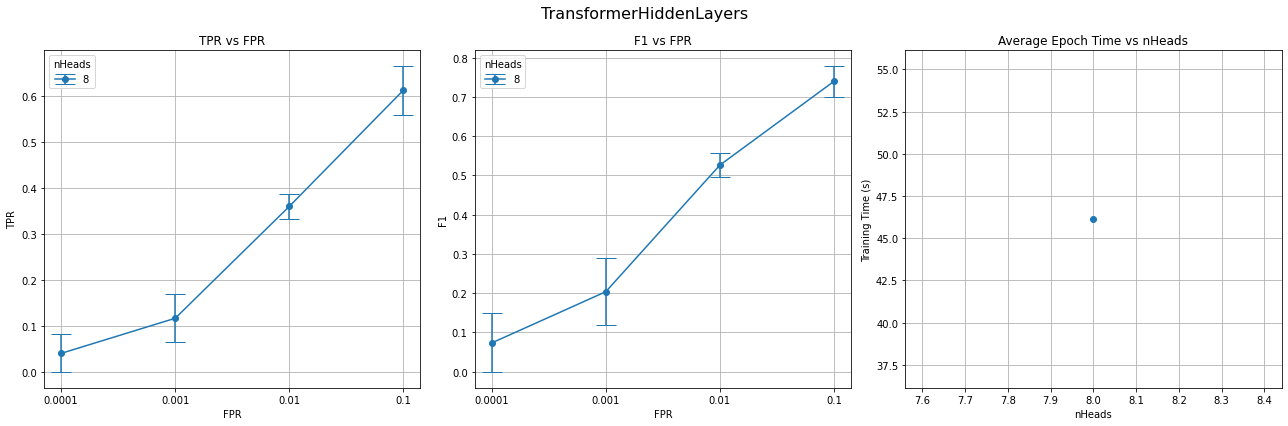

In [12]:
inFolder = "TransformerHiddenLayers"
field = "nHeads"
diffExtractor = lambda x: x.split(field)[1].split("_")[1]

plotCrossValidationFolder(inFolder, field, diffExtractor, savePath=f"{PLOT_OUT_FOLDER}{inFolder}.png")

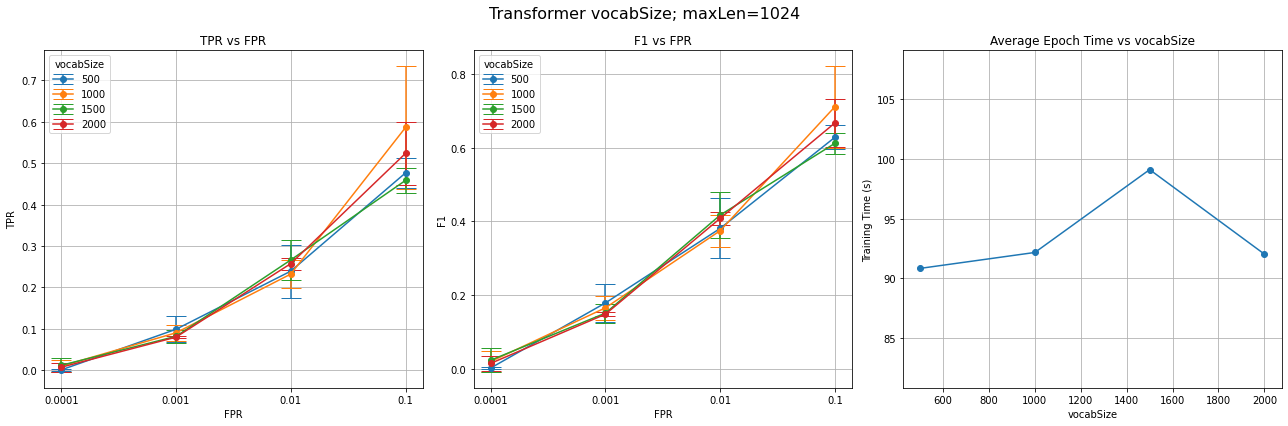

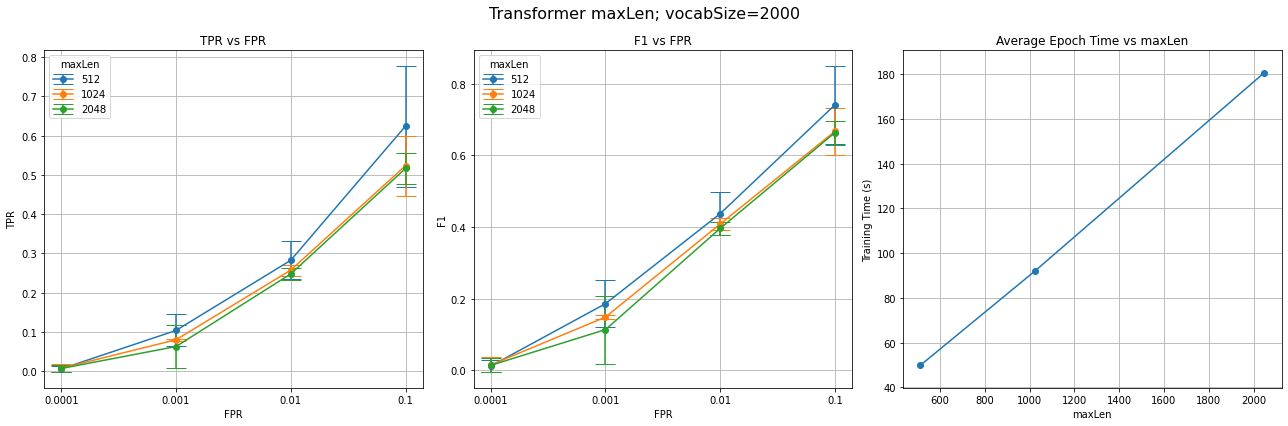

In [13]:
plotVocabSizeMaxLenTests("Transformer_VocabSize_maxLen", PLOT_OUT_FOLDER)

### LSTM

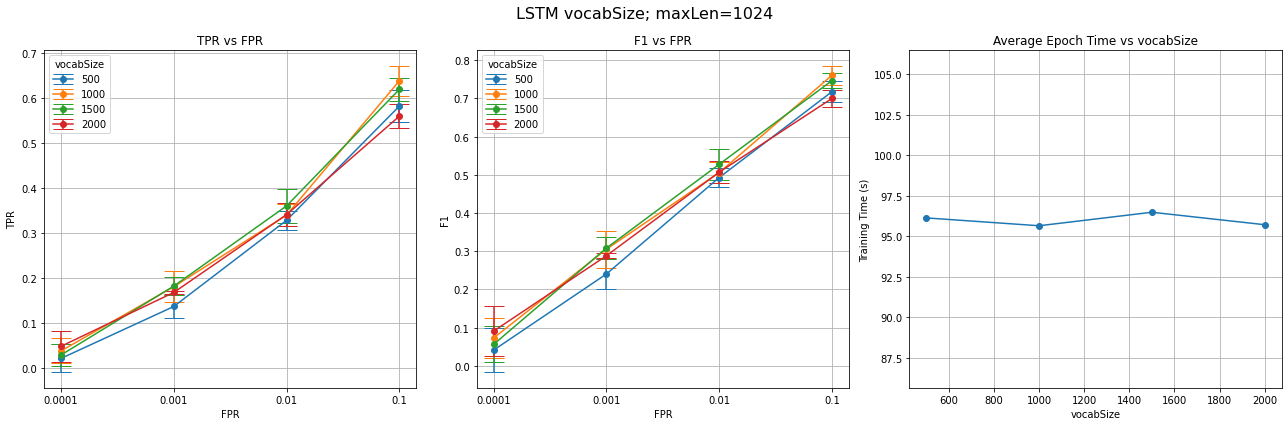

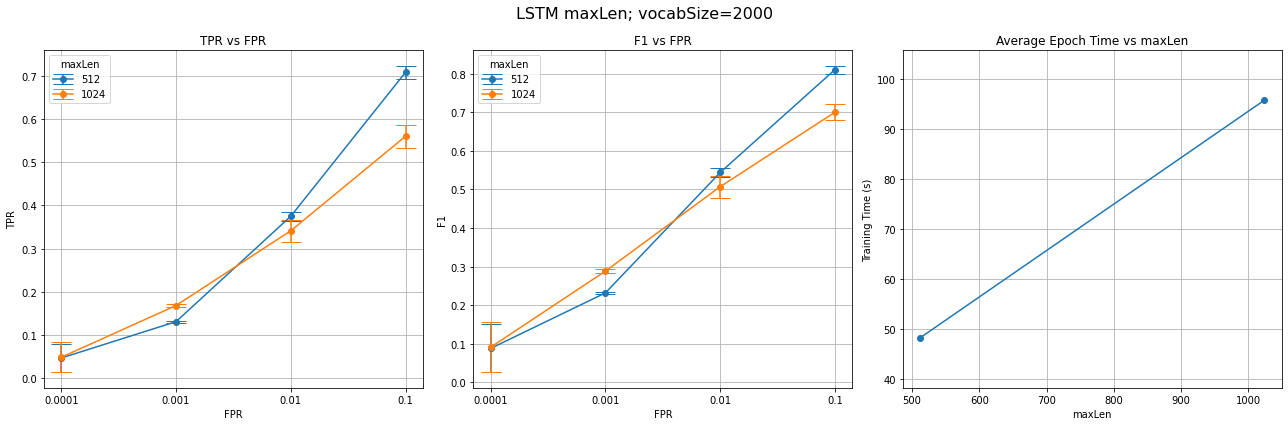

In [14]:
plotVocabSizeMaxLenTests("LSTM_VocabSize_maxLen", PLOT_OUT_FOLDER)

### Plot heatmap of maxLen and vocabSize